Data Exploration of new data provided by district 18 

In [2]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
data_path = os.path.join(repo_root, 'predicting-proficiency', 'data')

In [4]:
file_names = [
    ('2024-10-08 District 18 Scores.json', '2023 District 18 Scores.json'),
    ('2024-10-08 District 18 Schools.json', 'District 18 Anonymized Schools.json'),
    ('2024-10-08 District 18 Student Attributes.json', '2023 District 18 Student Attributes.json'),
    ('2024-10-08 District 18 Vendor Student Usage', '2023 Distrcit 18 Vendor Student Usage'),
    ('2024-10-08 Distrcit 18 Vendor Usage Types','District 18 Vendor Usage Types')
]

for old_name, new_name in file_names:
    old_path = os.path.join(data_path, 'raw', old_name)
    new_path = os.path.join(data_path, 'raw', new_name)
    if os.path.exists(old_path) and not os.path.exists(new_path):
        os.rename(old_path, new_path)

In [5]:
with open('data/raw/2023 District 18 Scores.json', 'r') as file:
    scores_json = json.loads(file.read())

with open('data/raw/District 18 Anonymized Schools.json', 'r') as file:
    schools_json = json.loads(file.read())

with open('data/raw/2023 District 18 Student Attributes.json', 'r') as file:
    studentAttributes_json = json.loads(file.read())

with open('data/raw/2023 District 18 Vendor Student Usage.json', 'r') as file:
    vendorUsage_json = json.loads(file.read())

with open('data/raw/District 18 Vendor Usage Types.json', 'r') as file:
    vendorUsageTypes_json = json.loads(file.read())

In [6]:
scores_data = scores_json[list(scores_json.keys())[0]]
scores_df= pd.DataFrame(scores_data)

schools_data = schools_json[list(schools_json.keys())[0]]
schools_df = pd.DataFrame(schools_data)

studentAttributes_data = studentAttributes_json[list(studentAttributes_json.keys())[0]]
studentAttributes_df=pd.DataFrame(studentAttributes_data)

vendorUsage_data = vendorUsage_json[list(vendorUsage_json.keys())[0]]
vendorUsage_df = pd.DataFrame(vendorUsage_data)

vendorUsageTypes_data = vendorUsageTypes_json[list(vendorUsageTypes_json.keys())[0]]
vendorUsageTypes_df = pd.DataFrame(vendorUsageTypes_data)



In [7]:
data_path = os.path.join(repo_root, 'predicting-proficiency', 'data')

processed_dir = os.path.join(data_path, 'processed')
if os.path.exists(processed_dir):
    for file in os.listdir(processed_dir):
        file_path = os.path.join(processed_dir, file)
        if os.path.isfile(file_path):
            os.unlink(file_path)

os.makedirs(os.path.dirname(data_path), exist_ok=True)
scores_df.to_csv(os.path.join(data_path, 'processed', '18_scores_2024-10-08.csv'), index=False)
schools_df.to_csv(os.path.join(data_path, 'processed', '18_schools_2024-10-08.csv'), index=False)
studentAttributes_df.to_csv(os.path.join(data_path, 'processed', '18_studentAttributes_2024-10-08.csv'), index=False)
vendorUsage_df.to_csv(os.path.join(data_path, 'processed', '18_vendorUsage_2024-10-08.csv'), index=False)
vendorUsageTypes_df.to_csv(os.path.join(data_path, 'processed', '18_vendorUsageTypes_2024-10-08.csv'), index=False)


scores

In [8]:
print(scores_df.columns)
print(scores_df.shape)

Index(['id', 'districtId', 'subgroup_TCAPELALevel', 'ticket', 'studentId',
       'studentLevel', 'year', 'scoreDate', 'measurementTypeId',
       'subgroup_specialEd',
       ...
       'value_ElpacOralLevel', 'value_ElpacWritten', 'value_ElpacWrittenLevel',
       'value_AcapSciRc1', 'value_AcapSciRc2', 'value_AcapSciRc3',
       'value_AcapSciRc4', 'value_fsaWriting', 'value_fsaWritingLevel',
       'value_acadienceReadingCompositeLevel'],
      dtype='object', length=715)
(132258, 715)


In [9]:
scores_df.head(15)


,id,districtId,subgroup_TCAPELALevel,ticket,studentId,studentLevel,year,scoreDate,measurementTypeId,subgroup_specialEd,...,value_ElpacOralLevel,value_ElpacWritten,value_ElpacWrittenLevel,value_AcapSciRc1,value_AcapSciRc2,value_AcapSciRc3,value_AcapSciRc4,value_fsaWriting,value_fsaWritingLevel,value_acadienceReadingCompositeLevel
0,3268686,18,0,1670274005jaxk7kpda0,1480117,11,2023,0000-00-00,4,0,...,0,0,0,0,0,0,0,0,0,0
1,4933778,18,0,,1480117,11,2023,0000-00-00,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5441518,18,0,,1480117,11,2023,0000-00-00,2,0,...,0,0,0,0,0,0,0,0,0,0
3,7263146,18,0,,1480117,11,2023,0000-00-00,6,0,...,0,0,0,0,0,0,0,0,0,0
4,7510656,18,0,,1480117,11,2023,0000-00-00,7,0,...,0,0,0,0,0,0,0,0,0,0
5,7515779,18,0,,1480117,11,2023,0000-00-00,3,0,...,0,0,0,0,0,0,0,0,0,0
6,4933508,18,0,,1480118,12,2023,0000-00-00,1,0,...,0,0,0,0,0,0,0,0,0,0
7,5444101,18,0,,1480118,12,2023,0000-00-00,2,0,...,0,0,0,0,0,0,0,0,0,0
8,4933512,18,0,,1480120,12,2023,0000-00-00,1,0,...,0,0,0,0,0,0,0,0,0,0
9,5442635,18,0,,1480120,12,2023,0000-00-00,2,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
for col in scores_df.columns:
    unique_values = scores_df[col].unique()
    nunique_values = scores_df[col].nunique()
    nan_count = scores_df[col].isna().sum()

    print(f"Unique values in '{col}' : {unique_values}\n")
    print(f"Nunique values in '{col}' : {nunique_values}\n")
    print(f"Number of NaN in '{col}' : {nan_count}\n")

Unique values in 'id' : [3268686 4933778 5441518 ... 7719120 7719121 7719122]

Nunique values in 'id' : 132258

Number of NaN in 'id' : 0

Unique values in 'districtId' : [18]

Nunique values in 'districtId' : 1

Number of NaN in 'districtId' : 0

Unique values in 'subgroup_TCAPELALevel' : [0]

Nunique values in 'subgroup_TCAPELALevel' : 1

Number of NaN in 'subgroup_TCAPELALevel' : 0

Unique values in 'ticket' : ['1670274005jaxk7kpda0' '' '1720038133u1v82g9ag2' '17273692353nnix0z0ux']

Nunique values in 'ticket' : 4

Number of NaN in 'ticket' : 0

Unique values in 'studentId' : [1480117 1480118 1480120 ... 2513587 2513589 2513590]

Nunique values in 'studentId' : 11633

Number of NaN in 'studentId' : 0

Unique values in 'studentLevel' : [11 12 56 10  8  6  7  9  5  3  4  2  1  0 52 62 -1]

Nunique values in 'studentLevel' : 17

Number of NaN in 'studentLevel' : 0

Unique values in 'year' : [2023]

Nunique values in 'year' : 1

Number of NaN in 'year' : 0

Unique values in 'scoreDate' 

In [ ]:
#all grades present 1-12 in student level scores

Schools

In [12]:
print(schools_df.columns)
print(schools_df.shape)

Index(['id', 'name', 'districtId', 'costCenter', 'abbreviation',
       'acqRequestSelectable', 'oneRoster_sourcedId', 'oneRoster_ticketId'],
      dtype='object')
(24, 8)


In [13]:
schools_df.head()

,id,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId
0,222,ELEMENTARY SCHOOL A,18,5,EES,1,,0
1,223,MIDDLE SCHOOL A,18,8,EMS,1,,0
2,224,HIGH SCHOOL A,18,10,ECHS,1,,0
3,225,JUNIOR HIGH B,18,12,ECJH,1,,0
4,226,ELEMENTARY SCHOOL B,18,18,HES,1,,0


In [14]:
for col in schools_df.columns:
    unique_values = schools_df[col].unique()
    nunique_values = schools_df[col].nunique()
    nan_count = schools_df[col].isna().sum()

    print(f"Unique values in '{col}' : {unique_values}\n")
    print(f"Nunique values in '{col}' : {nunique_values}\n")
    print(f"Number of NaN in '{col}' : {nan_count}\n")

Unique values in 'id' : [   222    223    224    225    226    227    228    229    230    231
    232    233    234    235    236    237    238    247    248    249
   1346  46049 282626 282627]

Nunique values in 'id' : 24

Number of NaN in 'id' : 0

Unique values in 'name' : ['ELEMENTARY SCHOOL A' 'MIDDLE SCHOOL A' 'HIGH SCHOOL A' 'JUNIOR HIGH B'
 'ELEMENTARY SCHOOL B' 'MIDDLE SCHOOL B' 'HIGH SCHOOL B' 'MIDDLE SCHOOL C'
 'ELEMENTARY SCHOOL C' 'ELEMENTARY SCHOOL D' 'INTERMEDIATE SCHOOL D'
 'HIGH SCHOOL C' 'ELEMENTARY SCHOOL E' 'ELEMENTARY SCHOOL F'
 'HIGH SCHOOL D' 'MIDDLE SCHOOL E' 'JUNIOR HIGH SCHOOL F'
 'Instructional Services' 'Instructional Support Services'
 'General and Administrative' 'THE EDGE' 'MIDDLE SCHOOL G'
 'TECHNICAL CENTER' 'Technical College']

Nunique values in 'name' : 24

Number of NaN in 'name' : 0

Unique values in 'districtId' : [18]

Nunique values in 'districtId' : 1

Number of NaN in 'districtId' : 0

Unique values in 'costCenter' : [   5    8   10   12   1

student Attributes

In [15]:
print(studentAttributes_df.shape)
print(studentAttributes_df.columns)

(337, 4)
Index(['districtId', 'studentId', 'year', 'value'], dtype='object')


In [18]:
studentAttributes_df.sample(25)

,districtId,studentId,year,value
287,18,1489715,2023,12
61,18,1483781,2023,12
336,18,2513269,2023,11
104,18,1484227,2023,11
327,18,1803586,2023,12
113,18,1484372,2023,12
180,18,1484962,2023,11
64,18,1483789,2023,11
75,18,1483897,2023,11
191,18,1485101,2023,11


<Axes: ylabel='value'>

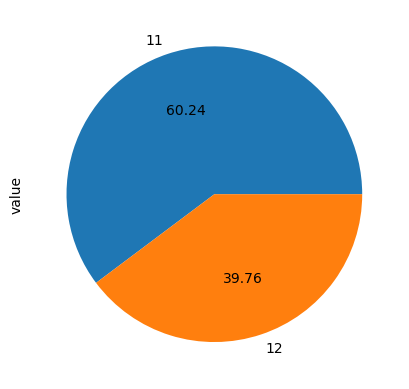

In [19]:
studentAttributes_df['value'].value_counts().plot.pie(autopct='%.2f')

In [20]:
for col in studentAttributes_df.columns:
    unique_values = studentAttributes_df[col].unique()
    nunique_values = studentAttributes_df[col].nunique()
    nan_count = studentAttributes_df[col].isna().sum()

    print(f"Unique values in '{col}' : {unique_values}\n")
    print(f"Nunique values in '{col}' : {nunique_values}\n")
    print(f"Number of NaN in '{col}' : {nan_count}\n")

Unique values in 'districtId' : [18]

Nunique values in 'districtId' : 1

Number of NaN in 'districtId' : 0

Unique values in 'studentId' : [1480395 1480554 1481892 1482258 1482301 1482378 1482486 1482843 1482879
 1482947 1482966 1482973 1482994 1482997 1483022 1483034 1483037 1483125
 1483142 1483160 1483262 1483370 1483389 1483438 1483448 1483456 1483476
 1483484 1483488 1483491 1483495 1483504 1483533 1483559 1483569 1483576
 1483579 1483606 1483612 1483623 1483630 1483641 1483647 1483658 1483683
 1483686 1483716 1483717 1483723 1483759 1483774 1483778 1483781 1483783
 1483789 1483805 1483810 1483814 1483829 1483843 1483865 1483874 1483878
 1483897 1483899 1483910 1483932 1483937 1483942 1483957 1483977 1483995
 1484018 1484042 1484079 1484119 1484124 1484127 1484130 1484143 1484149
 1484151 1484163 1484204 1484209 1484210 1484227 1484257 1484269 1484270
 1484340 1484344 1484351 1484353 1484370 1484372 1484419 1484429 1484438
 1484441 1484442 1484448 1484449 1484451 1484465 1484486 

Vendor Usage

In [22]:
print(vendorUsage_df.shape)
print(vendorUsage_df.columns)

(70315, 7)
Index(['districtId', 'studentId', 'year', 'vendorId', 'active', 'usageTypeId',
       'weeklyUsageMinutes'],
      dtype='object')


In [24]:
vendorUsage_df.head()

,districtId,studentId,year,vendorId,active,usageTypeId,weeklyUsageMinutes
0,18,1480117,2023,140472,0,39,4
1,18,1480117,2023,11333,0,6,0
2,18,1480117,2023,72609,0,3,0
3,18,1480118,2023,140472,0,39,4
4,18,1480118,2023,11333,0,6,0


In [25]:
for col in vendorUsage_df.columns:
    unique_values = vendorUsage_df[col].unique()
    nunique_values = vendorUsage_df[col].nunique()
    nan_count = vendorUsage_df[col].isna().sum()

    print(f"Unique values in '{col}' : {unique_values}\n")
    print(f"Nunique values in '{col}' : {nunique_values}\n")
    print(f"Number of NaN in '{col}' : {nan_count}\n")

Unique values in 'districtId' : [18]

Nunique values in 'districtId' : 1

Number of NaN in 'districtId' : 0

Unique values in 'studentId' : [1480117 1480118 1480120 ... 1804198 1804199 1804201]

Nunique values in 'studentId' : 11654

Number of NaN in 'studentId' : 0

Unique values in 'year' : [2023]

Nunique values in 'year' : 1

Number of NaN in 'year' : 0

Unique values in 'vendorId' : [140472  11333  72609 140574 132810 138965 132795]

Nunique values in 'vendorId' : 7

Number of NaN in 'vendorId' : 0

Unique values in 'active' : [0]

Nunique values in 'active' : 1

Number of NaN in 'active' : 0

Unique values in 'usageTypeId' : [39  6  3 42  2  4 40 24 27  5  1  9 41 23 22 25 26 38 37]

Nunique values in 'usageTypeId' : 19

Number of NaN in 'usageTypeId' : 0

Unique values in 'weeklyUsageMinutes' : [   4    0  104 ... 4021 2232 3487]

Nunique values in 'weeklyUsageMinutes' : 3379

Number of NaN in 'weeklyUsageMinutes' : 0



Vendor Usage types

In [26]:
print(vendorUsageTypes_df.columns)
print(vendorUsageTypes_df.shape)

Index(['id', 'name', 'districtId', 'usageTypeId', 'roiBucketType',
       'initiativeId', 'vendorId', 'utilBucketType', 'weeklyUsageMinutes',
       'productId'],
      dtype='object')
(290, 10)


In [27]:
vendorUsageTypes_df.head()

,id,name,districtId,usageTypeId,roiBucketType,initiativeId,vendorId,utilBucketType,weeklyUsageMinutes,productId
0,4,IXL Reading Non,18,1,loss,61,72609,nonUser,0,0
1,5,IXL Reading Partial,18,2,loss,61,72609,partialUser,0,0
2,6,IXL Reading User,18,3,gain,61,72609,fullUser,0,0
3,7,IXL Math Non User,18,4,loss,60,11333,nonUser,0,0
4,8,IXL Math Partial,18,5,loss,60,11333,partialUser,0,0


In [28]:
for col in vendorUsageTypes_df.columns:
    unique_values = vendorUsageTypes_df[col].unique()
    nunique_values = vendorUsageTypes_df[col].nunique()
    nan_count = vendorUsageTypes_df[col].isna().sum()

    print(f"Unique values in '{col}' : {unique_values}\n")
    print(f"Nunique values in '{col}' : {nunique_values}\n")
    print(f"Number of NaN in '{col}' : {nan_count}\n")

Unique values in 'id' : [    4     5     6     7     8     9   175   176   177   178   179   180
   724   725   726   727   728   729   730   731   732   853   854   855
   856   857   858  1130  1131  1132  1133  1134  1135  1472  1473  1474
  1475  1476  1477  1584  1585  1586  1587  1588  1589  1593  1594  1595
  1596  1597  1598  1599  1600  1601  1602  1603  1604  1911  1912  1913
  1914  1915  1916  2341  2342  2343  2344  2345  2346  2347  2348  2349
  2350  2351  2352  2409  2410  2411  2412  2413  2414  2415  2416  2417
  2418  2419  2420  2421  2422  2423  2424  2425  2426  2427  2428  2429
  2430  2431  2432  3124  3125  3126  3400  3401  3403  3409  3412  3413
  3414  3469  3470  3471  3472  3473  3474  3475  3476  3477  3560  3561
  3562  3563  3564  3565  3566  3567  3568  4302  4303  4304  4305  4306
  4307  4308  4309  4310  4311  4312  4313  4314  4315  4316  4317  4318
  4319  4366  4367  4368  4369  4370  4371  4372  4373  4374  4375  4376
  4377  5754  5755  5756  5